<a href="https://colab.research.google.com/github/kamil3di/ozone_level_detection/blob/main/ozone_level_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
The datasets are downloaded
'''
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.names

In [2]:
import pandas as pd
'''
The first column is for dates so the first column is assigned as 
index column(index_col=0).There is no header at the top of the data.
'''
data = pd.read_csv("/content/onehr.data",
                   header=None,
                   index_col=0,
                   parse_dates=True,
                   squeeze=True)

In [3]:
'''
To briefly describe the problem there are several attributes that is related
with ozone level. These attributes that are highly valued by Texas Commission 
on Environmental Quality (TCEQ).
The last column is our classes and has 2 statement 0 and 1. 0 means bad ozone 
level day and 1 means good ozone level day. 
'''
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.58,0.0


In [4]:
'''
The number of observations and the number of features are stated in data.shape
method. The first index gives the number of observations that is 2536 and the
second one gives the number of features, 73.
'''
print(data.shape)

(2536, 73)


In [5]:
'''
The features are listed below.
'''
names_data = pd.read_csv("/content/onehr.names", error_bad_lines=False)
new_array = names_data.values[28:100]
new_array = new_array.flatten()
new_array = pd.DataFrame([new_array])
new_array

b'Skipping line 8: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 2\nSkipping line 23: expected 1 fields, saw 6\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 3\n'


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,WSR0: continuous.,WSR1: continuous.,WSR2: continuous.,WSR3: continuous.,WSR4: continuous.,WSR5: continuous.,WSR6: continuous.,WSR7: continuous.,WSR8: continuous.,WSR9: continuous.,WSR10: continuous.,WSR11: continuous.,WSR12: continuous.,WSR13: continuous.,WSR14: continuous.,WSR15: continuous.,WSR16: continuous.,WSR17: continuous.,WSR18: continuous.,WSR19: continuous.,WSR20: continuous.,WSR21: continuous.,WSR22: continuous.,WSR23: continuous.,WSR_PK: continuous.,WSR_AV: continuous.,T0: continuous.,T1: continuous.,T2: continuous.,T3: continuous.,T4: continuous.,T5: continuous.,T6: continuous.,T7: continuous.,T8: continuous.,T9: continuous.,T10: continuous.,T11: continuous.,T12: continuous.,T13: continuous.,T14: continuous.,T15: continuous.,T16: continuous.,T17: continuous.,T18: continuous.,T19: continuous.,T20: continuous.,T21: continuous.,T22: continuous.,T23: continuous.,T_PK: continuous.,T_AV: continuous.,T85: continuous.,RH85: continuous.,U85: continuous.,V85: continuous.,HT85: continuous.,T70: continuous.,RH70: continuous.,U70: continuous.,V70: continuous.,HT70: continuous.,T50: continuous.,RH50: continuous.,U50: continuous.,V50: continuous.,HT50: continuous.,KI: continuous.,TT: continuous.,SLP: continuous.,SLP_: continuous.,Precp: continuous.


In [6]:
'''
The missing data are replaced with NaN.
'''
import numpy as np

data.replace(to_replace = "?", value = np.nan,inplace=True)

In [7]:
'''
There are lots of missing data.
'''
obj = data.isnull().sum()
obj_list = []
for key,value in obj.iteritems():
    case = {'{}.'.format(key): "Missing value :{}".format(value)}
    obj_list.append(case)
print(obj_list)

[{'1.': 'Missing value :299'}, {'2.': 'Missing value :292'}, {'3.': 'Missing value :294'}, {'4.': 'Missing value :292'}, {'5.': 'Missing value :293'}, {'6.': 'Missing value :292'}, {'7.': 'Missing value :291'}, {'8.': 'Missing value :289'}, {'9.': 'Missing value :290'}, {'10.': 'Missing value :287'}, {'11.': 'Missing value :288'}, {'12.': 'Missing value :292'}, {'13.': 'Missing value :287'}, {'14.': 'Missing value :288'}, {'15.': 'Missing value :288'}, {'16.': 'Missing value :286'}, {'17.': 'Missing value :284'}, {'18.': 'Missing value :283'}, {'19.': 'Missing value :286'}, {'20.': 'Missing value :292'}, {'21.': 'Missing value :294'}, {'22.': 'Missing value :293'}, {'23.': 'Missing value :300'}, {'24.': 'Missing value :297'}, {'25.': 'Missing value :273'}, {'26.': 'Missing value :273'}, {'27.': 'Missing value :190'}, {'28.': 'Missing value :185'}, {'29.': 'Missing value :187'}, {'30.': 'Missing value :184'}, {'31.': 'Missing value :184'}, {'32.': 'Missing value :183'}, {'33.': 'Missing

In [8]:
'''
Mean value of every column's are added to NaN values. I tried to do adding 0 
instead of adding mean value but mean value gave better results.
'''
for col in data.columns:  
  data.iloc[:,col-1].fillna((data.iloc[:,col-1].apply(lambda x: float(x)).mean()),inplace=True)

In [9]:
'''
There are no missing values so that we eliminated these values by adding the
mean value.
'''
obj = data.isnull().sum()
obj_list = []
for key,value in obj.iteritems():
    case = {'{}.'.format(key): "Missing value :{}".format(value)}
    obj_list.append(case)
print(obj_list)

[{'1.': 'Missing value :0'}, {'2.': 'Missing value :0'}, {'3.': 'Missing value :0'}, {'4.': 'Missing value :0'}, {'5.': 'Missing value :0'}, {'6.': 'Missing value :0'}, {'7.': 'Missing value :0'}, {'8.': 'Missing value :0'}, {'9.': 'Missing value :0'}, {'10.': 'Missing value :0'}, {'11.': 'Missing value :0'}, {'12.': 'Missing value :0'}, {'13.': 'Missing value :0'}, {'14.': 'Missing value :0'}, {'15.': 'Missing value :0'}, {'16.': 'Missing value :0'}, {'17.': 'Missing value :0'}, {'18.': 'Missing value :0'}, {'19.': 'Missing value :0'}, {'20.': 'Missing value :0'}, {'21.': 'Missing value :0'}, {'22.': 'Missing value :0'}, {'23.': 'Missing value :0'}, {'24.': 'Missing value :0'}, {'25.': 'Missing value :0'}, {'26.': 'Missing value :0'}, {'27.': 'Missing value :0'}, {'28.': 'Missing value :0'}, {'29.': 'Missing value :0'}, {'30.': 'Missing value :0'}, {'31.': 'Missing value :0'}, {'32.': 'Missing value :0'}, {'33.': 'Missing value :0'}, {'34.': 'Missing value :0'}, {'35.': 'Missing value

In [ ]:
'''It is a code part instead of adding mean value to NaN values if the NaN
value is seen all row is eliminated.
'''
#data.dropna(axis=0,inplace=True)

In [11]:
'''
We can see how two classes are seperated by using for loop. There is a 
imbalanced data problem here because the number of 0's are visibly higher
than the number of 1's(97% to 3%).
'''
counts = data.groupby(73).size()
for i in range(len(counts)):
	percent = counts[i] / data.shape[0] * 100
	print('Class=%d, total=%d, percentage=%.3f' % (i, counts[i], percent))

Class=0, total=2463, percentage=97.121
Class=1, total=73, percentage=2.879


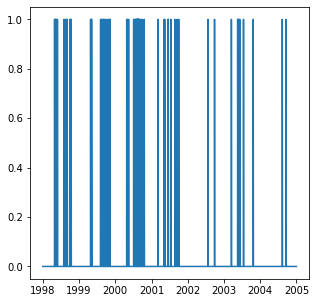

In [12]:
'''
The distribution of classes is shown below figure. The imbalanced data can be
observed.
'''
from matplotlib import pyplot
pyplot.figure(figsize=(5,5))
pyplot.plot(data.index, data.iloc[:,-1])
pyplot.show()

I have used StandardScaler method to scale data because it gave slightly higher
performance -based on f1-score- on imbalanced data. The another reason to scale
the data some of the variables differiantiate from 0 to 1000 and another are 10 to 20. The scaling process help the model to maintain training faster.

PCA(dimension reduction) was used but it gave lesser accuracy so that it was not implemented to pipeline.

Cross validation technique is used due to the imbalanced data. It will prevent
overfitting.

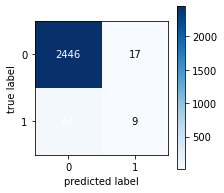

              precision    recall  f1-score   support

     Bad day       0.97      0.99      0.98      2463
    Good day       0.35      0.12      0.18        73

    accuracy                           0.97      2536
   macro avg       0.66      0.56      0.58      2536
weighted avg       0.96      0.97      0.96      2536



In [13]:
'''
Classification using KNN algorithm. 
'''
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot

data_knn = data.values
# separate into input and output columns
X, y = data_knn[:, :-1], data_knn[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
tran = StandardScaler()
#pca = PCA(n_components=5)
model =  KNeighborsClassifier(n_neighbors=5)
pipeline = Pipeline(steps=[('t', tran), ('m', model)])
# evaluate the pipeline
cv = 10
y_pred_KNN = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)

# report pipeline performance
cm = confusion_matrix(y,y_pred_KNN)
fig,ax = plot_confusion_matrix(conf_mat= cm,
                               figsize=(3,3),
                               colorbar=True,
                               show_normed = False)
pyplot.show()

target_names = ['Bad day', 'Good day']
print(classification_report(y,y_pred_KNN,target_names=target_names))

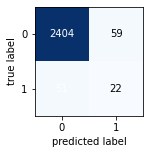

              precision    recall  f1-score   support

     Bad day       0.98      0.98      0.98      2463
    Good day       0.27      0.30      0.29        73

    accuracy                           0.96      2536
   macro avg       0.63      0.64      0.63      2536
weighted avg       0.96      0.96      0.96      2536



In [14]:
'''
Classification using Neural Network(Multi-layer Percepton) algorithm.
'''
from sklearn.neural_network import MLPClassifier

data_MLP = data.values
# separate into input and output columns
X, y = data_MLP[:, :-1], data_MLP[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
tran = StandardScaler()
#pca = PCA(n_components=2)
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=0)
pipeline = Pipeline(steps=[('t', tran),('m', model)])
# evaluate the pipeline
cv = 10
y_pred_MLP = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
# report pipeline performance
cm = confusion_matrix(y,y_pred_MLP)
fig,ax = plot_confusion_matrix(conf_mat= cm, figsize=(2,2),show_normed = False)
pyplot.show()

target_names = ['Bad day', 'Good day']
print(classification_report(y,y_pred_MLP,target_names=target_names))

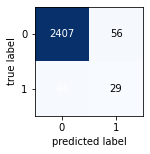

              precision    recall  f1-score   support

     Bad day       0.98      0.98      0.98      2463
    Good day       0.34      0.40      0.37        73

    accuracy                           0.96      2536
   macro avg       0.66      0.69      0.67      2536
weighted avg       0.96      0.96      0.96      2536



In [15]:
'''
Classification using Stochastic Gradient Descent algorithm.
'''
from sklearn.linear_model import SGDClassifier

data_SVM = data.values
# separate into input and output columns
X, y = data_SVM[:, :-1], data_SVM[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
tran = StandardScaler()
#pca = PCA(n_components=2)
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=5,random_state=0)
pipeline = Pipeline(steps=[('t', tran),('m', model)])
# evaluate the pipeline
cv = 10
y_pred_SGD = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
# report pipeline performance
cm = confusion_matrix(y,y_pred_SGD)
fig,ax = plot_confusion_matrix(conf_mat= cm, figsize=(2,2),show_normed = False)
pyplot.show()

target_names = ['Bad day', 'Good day']
print(classification_report(y,y_pred_SGD,target_names=target_names))

KNN ROC AUC=0.558
MLP ROC AUC=0.639
SGD ROC AUC=0.687


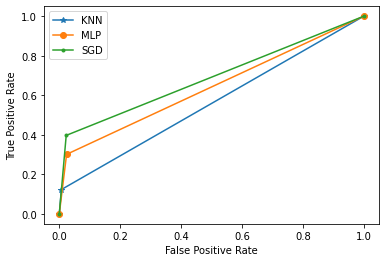

In [16]:
'''
ROC curve is sketched and AUC scores are printed.
'''

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

KNN_auc = roc_auc_score(y, y_pred_KNN)
print('KNN ROC AUC=%.3f' % (KNN_auc))

MLP_auc = roc_auc_score(y, y_pred_MLP)
print('MLP ROC AUC=%.3f' % (MLP_auc))

SGD_auc = roc_auc_score(y, y_pred_SGD)
print('SGD ROC AUC=%.3f' % (SGD_auc))

#False Positive and True Positive values
knn_fpr, knn_tpr, _ = roc_curve(y, y_pred_KNN)
mlp_fpr, mlp_tpr, _ = roc_curve(y, y_pred_MLP)
sgd_fpr, sgd_tpr, _ = roc_curve(y, y_pred_SGD)

pyplot.plot(knn_fpr, knn_tpr, marker='*', label='KNN')
pyplot.plot(mlp_fpr, mlp_tpr, marker='o', label='MLP')
pyplot.plot(sgd_fpr, sgd_tpr, marker='.', label='SGD')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**As I see it, Stochastic Gradient Descent algorithm gave the best results
because if f1-score's are compared between 3 models each model have 0.98 
f1-score for "bad day" class but the highest f1-score is 0.37 in SGD model.**

If the models are examined from accuracy score KNN model has 97% and other have 96% accuracy score but these values are misleading to decide if the model is working well or not.


KNN model's ROC AUC score:0.558  / MLP model's ROC AUC score:0.639    /  SGD model's ROC AUC score:0.687

**AUC score ranges from 0 to 1 and the percentage increase with correctness of model. 0.0 for 100% wrong predictions and 1.0 for 100% correct.**


Just because our data is imbalanced f1-score is more important than AUC score.But in extra, SGD model has higher AUC score related to other models.

We have to use Precision-Recall curves to observe performance.

KNN: f1=0.182 auc=0.247
MLP: f1=0.286 auc=0.297
SGD: f1=0.367 auc=0.378


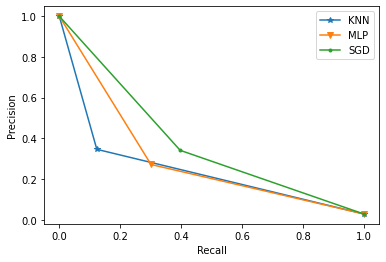

In [17]:
'''
Precision-Recall curves are created for 3 different models.
'''
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

knn_precision, knn_recall, _ = precision_recall_curve(y, y_pred_KNN)
knn_f1, knn_auc = f1_score(y, y_pred_KNN), auc(knn_recall, knn_precision)

mlp_precision, mlp_recall, _ = precision_recall_curve(y, y_pred_MLP)
mlp_f1, mlp_auc = f1_score(y, y_pred_MLP), auc(mlp_recall, mlp_precision)

sgd_precision, sgd_recall, _ = precision_recall_curve(y, y_pred_SGD)
sgd_f1, sgd_auc = f1_score(y, y_pred_SGD), auc(sgd_recall, sgd_precision)

# summarize scores
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
print('MLP: f1=%.3f auc=%.3f' % (mlp_f1, mlp_auc))
print('SGD: f1=%.3f auc=%.3f' % (sgd_f1, sgd_auc))
# plot the precision-recall curves
pyplot.plot(knn_recall, knn_precision, marker='*', label='KNN')
pyplot.plot(mlp_recall, mlp_precision, marker='v', label='MLP')
pyplot.plot(sgd_recall, sgd_precision, marker='.', label='SGD')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**SGD model has showed better performance on precision-recall curves.**

For further researches, GridSearch method can be used to find more appropriate hyperparameters.